# Session 3
## Experiment 1
### Lab3

*After completing this exercise please complete the Check For Understanding questions in the LMS*

# Part1: Binary Classification Problem

### Data Source
In this experiment, we will use the CIFAR-10 dataset consists of 60,000 32x32 colour images in 10 classes, with 6000 images per class. There are 50,000 training images and 10,000 test images.

https://www.cs.toronto.edu/~kriz/cifar.html


The images have been downloaded and unzipped for you in the directory cifar-10

They are in a particular python-specific format called pickle. You need not worry about the format's internals, as the site has given the code needed to read such files. The code is given in the first code block below.

**The code returns the contents of each data file as a dictionary**.

## Quick look at the data

There are 8 files in the cifar-10 directory.

batches.meta

data_batch_1

data_batch_2	

data_batch_3

data_batch_4	

data_batch_5

readme.html

test_batch

We will take a peek at these files.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os

# Special function to read special files
def unpickle(file):
    import pickle
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='latin1')
    return dict

**data** a 10,000x3072 numpy array of uint8s. Each row of the array stores a 32x32 colour image. The first 1024 entries contain the red channel values, the next 1024 the green, and the final 1024 the blue. The image is stored in row-major order, so that the first 32 entries of the array are the red channel values of the first row of the image.

**labels** a list of 10,000 numbers in the range 0-9. The number at index i indicates the label of the ith image in the array data.

## Visualize the Dataset

Class = horse
(32, 32, 3)


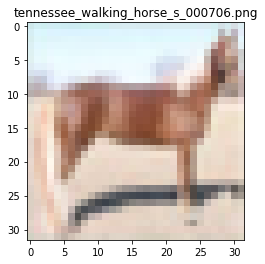

In [3]:
## Visualize the images in CIFAR-10 Dataset
## Here get_data unpickles the CIFAR Dataset and stores the data as 10000*3072 dimension in array X 
## and labels as 10000*1 dimension in array Y. 
## Visualize function shows the image corresponding to id number.

def get_data(file):
    dict = unpickle(file)
    X = np.asarray(dict['data']).astype("uint8")
    Y = np.asarray(dict['labels'])
    names = np.asarray(dict['filenames'])
    list_class=(unpickle("../Datasets/cifar-10/batches.meta")['label_names'])
    return X,Y,names,list_class
                     

def visualize_image(X, Y, names, image_id):
    rgb = X[image_id,:]
    img = rgb.reshape(3, 32, 32).transpose([1, 2, 0])
    print(img.shape)
    plt.imshow(img)
    plt.title(names[image_id])
    plt.show()

# Read image
X, Y, names, classes = get_data("../Datasets/cifar-10/data_batch_3")
# Visualize the 10th image
pick = 10
print("Class =",classes[Y[pick]])
visualize_image(X, Y, names, pick)

We shall run a linear classifier. You can look at the code that calculates weights for the optimal line in "perceptron_sgd".

In [4]:
## Linear classifier code -
# code to estimate optimal linear boundary,
# classify train data by estimating the optimal linear boundary,
# predict labels based on linear boundary,
# and compute the accuracy of the classification

# code to estimate optimal linear boundary (can ignore for now),
def perceptron_sgd(X, Y):
    w = np.zeros(len(X[0]))
    eta = 0.01 # learning rate
    epochs = 100
    for t in range(epochs):
        if (t+1) % 50 == 0:
            print("Running Epoch #", t+1)
            # print("acc:", compute_accuracy(predict(X[:, :-1], w), Y))
        for i, x in enumerate(X):
            if (np.dot(X[i], w) * Y[i]) <= 0:
                w = w + eta * X[i] * Y[i]
        eta *= 0.75
    return w

# classify train data by estimating the optimal linear boundary,
def classify(train_feat, train_labels):
    ## mapping first label to -1 and second to +1
    labels = np.sort(np.unique(train_labels))
    lmap = {labels[0] : -1, labels[1] : 1}
    l = [lmap[i] for i in train_labels]     
    ## appending 1 to train features
    add_one2train = np.ones((len(train_feat), 1))
    append_train_features = np.hstack((np.asarray(train_feat), add_one2train))
    w = perceptron_sgd(append_train_features, l)
    return w

# predict labels based on linear boundary,
def predict(features, w):
    ##appending 1 to test features
    add_one = np.ones((len(features),1))
    append_features = np.hstack((np.asarray(features), add_one))
    pred = np.dot(append_features, w)
    return pred

# compute the accuracy of the classification
def compute_accuracy(pred, test_labels):
    # To make it general, let us find the unique set of labels in test_labels
    # (could be "apples" and "oranges", or "1" and "2"),
    labels = np.sort(np.unique(test_labels))
    # and then assign -1 and 1 to these unique labels
    lmap = {labels[0] : -1, labels[1] : 1}
    # Let's now convert the labels to -1 and 1
    l = [lmap[i] for i in test_labels]
    # Let us find the accuracy
    p = []
    for i in range(len(pred)):
        p.append(1 if pred[i] >= 0 else -1)
    acc = np.mean(np.asarray(p) == np.asarray(l))
    return acc

In [5]:
# Function for binary classification
def one_vs_one_classifier_ours(train_features, train_labels):
    w = classify(train_features, train_labels)
    return w

def calc_accuracy(X_test, Y_test, w):
    pred = predict(X_test, w)
    accuracy = compute_accuracy(pred, Y_test)
    print("accuracy =", accuracy)

## Task
To study the effect of different features on binary classification.  

### Feature type 1: Raw Intensity values of RGB 
Use Intensity values of RGB as intensity features. For this use the raw intensity features extracted above.

In [7]:
## Unpickling the data and labels from CIFAR-10 Dataset,
## and Preparing the raw features for training and test data.

X_train = []
Y_train = []
# Read all training features and labels
for j in "12345": 
    batch_file = '../Datasets/cifar-10/data_batch_'+ j
    x_train, y_train, names_train, classes_train = get_data(batch_file)
    X_train.extend(x_train)
    Y_train.extend(y_train)

X_train = np.asarray(X_train)
Y_train = np.asarray(Y_train)

# Read all test features and labels
X_test, Y_test, names_test, classes_test = get_data("../Datasets/cifar-10/test_batch")

Now, select only classes #5 and #7, and make a linear classifier for these two classes. 

In [8]:
def extract_2classes(class0, class1, X, Y):
    # Select class #0
    X_0 = X[Y == class0]
    Y_0 = Y[Y == class0]
    # Select class #1
    X_1 = X[Y == class1]
    Y_1 = Y[Y == class1]
    # Join the two classes to make the set
    X_2classes = np.vstack((X_0, X_1))
    Y_2classes = np.append(Y_0, Y_1)
    return X_2classes, Y_2classes

In [9]:
# Select classes #5 and #7
X_train_2classes, Y_train_2classes = extract_2classes(5, 7, X_train, Y_train)
X_test_2classes, Y_test_2classes = extract_2classes(5, 7, X_test, Y_test)

In [10]:
# Binary classification for classes 1 and 2 using hand features
w = one_vs_one_classifier_ours(X_train_2classes, Y_train_2classes)

# Find accuracy
calc_accuracy(X_test_2classes, Y_test_2classes, w)

Running Epoch # 50
Running Epoch # 100
accuracy = 0.644


### Feature type 2: Hand crafted features
For this we extracted 9 dimension feature for each image. Feature consist of min,max and mean intensity values for RGB channel.

In [11]:
## Hand crafted features. For this we extracted 9 dimension feature for each image.
## Feature consist of min, max and mean intensity values for RGB channel.

# Extract min, max and mean of R, G, and B in each image
# in train
def extract_RGB_min_max_mean(X):
    R, G, B = 1024, 2048, 3072
    R_min = np.reshape(np.min(X[:, :R], axis=1), (len(X), 1))
    R_max = np.reshape(np.max(X[:, :R], axis=1), (len(X), 1))
    R_mean = np.reshape(np.mean(X[:, :R], axis=1), (len(X), 1))
    G_min = np.reshape(np.min(X[:, R:G], axis=1), (len(X), 1))
    G_max = np.reshape(np.max(X[:, R:G], axis=1), (len(X), 1))
    G_mean = np.reshape(np.mean(X[:, R:G], axis=1), (len(X), 1))
    B_min = np.reshape(np.min(X[:, G:B], axis=1), (len(X), 1))
    B_max = np.reshape(np.max(X[:, G:B], axis=1), (len(X), 1))
    B_mean = np.reshape(np.mean(X[:, G:B], axis=1), (len(X), 1))
    return np.hstack((R_min, R_max, R_mean, G_min, G_max, G_mean, B_min, B_max, B_mean))

head_features_train = extract_RGB_min_max_mean(X_train_2classes)
head_features_test = extract_RGB_min_max_mean(X_test_2classes)

In [12]:
head_features_train.shape

(10000, 9)

In [13]:
# Binary classification for classes 1 and 2 using hand features
w = one_vs_one_classifier_ours(head_features_train, Y_train_2classes)

# Find accuracy
calc_accuracy(head_features_test, Y_test_2classes, w)

Running Epoch # 50
Running Epoch # 100
accuracy = 0.5085


### Feature-type3: PCA Features
Use PCA to reduce features high dimensionality features into low dimansionality features

In [14]:
## apply pca
from sklearn.decomposition import PCA

def extract_eigenvectors(k, X_train):
    pca = PCA(n_components=k)
    pca.fit(X_train)
    eigen_vectors = pca.components_
    return eigen_vectors, pca

def make_pca_features(eigen_vectors, X):
    return np.transpose(np.dot(eigen_vectors, np.transpose(X)))

Let's try with k = 200.

In [15]:
# Make pca features
k = 200
eigen_vectors, pca_object = extract_eigenvectors(k, X_train_2classes)
pca_features_train_2classes = make_pca_features(eigen_vectors, X_train_2classes)
pca_features_test_2classes = make_pca_features(eigen_vectors, X_test_2classes)

In [16]:
# Binary classification for classes 1 and 2 using hand features
w = one_vs_one_classifier_ours(pca_features_train_2classes, Y_train_2classes)

# Find accuracy
calc_accuracy(pca_features_test_2classes, Y_test_2classes, w)

Running Epoch # 50
Running Epoch # 100
accuracy = 0.637


In [17]:
## Try different k values
for k in [800, 1000, 1200, 1400]:
    print("Training with k =", k)
    # Make pca features
    eigen_vectors, pca_object = extract_eigenvectors(k, X_train_2classes)
    pca_features_train = make_pca_features(eigen_vectors, X_train_2classes)
    pca_features_test = make_pca_features(eigen_vectors, X_test_2classes)
    # Binary classification for classes 1 and 2 using hand features
    w = one_vs_one_classifier_ours(pca_features_train, Y_train_2classes)
    # Find accuracy
    calc_accuracy(pca_features_test, Y_test_2classes, w)

Training with k = 800
Running Epoch # 50
Running Epoch # 100
accuracy = 0.6435
Training with k = 1000
Running Epoch # 50
Running Epoch # 100
accuracy = 0.6445
Training with k = 1200
Running Epoch # 50
Running Epoch # 100
accuracy = 0.641
Training with k = 1400
Running Epoch # 50
Running Epoch # 100
accuracy = 0.644


### Feature type-4: Deep Features

In [19]:
# Load the deep features of images
import scipy.io as sio
import numpy as np
features = sio.loadmat('../Datasets/cifar-10/cifar10_deep_features.mat')

In [20]:
# Extracting the deep features into training and testing
deep_features_train = features['x_train']
deep_labels_train = np.transpose(features['y_train'])
deep_features_test = features['x_test']
deep_labels_test = np.transpose(features['y_test'])
print(deep_features_train.shape, deep_labels_train.shape, deep_features_test.shape, deep_labels_test.shape)

(50000, 512) (50000, 1) (10000, 512) (10000, 1)


In [21]:
# Extract features of class0 and class1
deep_features_train_2classes, deep_labels_train_2classes = extract_2classes(5, 7, deep_features_train, np.squeeze(deep_labels_train))
deep_features_test_2classes, deep_labels_test_2classes = extract_2classes(5, 7, deep_features_test, np.squeeze(deep_labels_test))

In [22]:
# Binary classification for classes 1 and 2 using hand features
w = one_vs_one_classifier_ours(deep_features_train_2classes, deep_labels_train_2classes)

# Find accuracy
calc_accuracy(deep_features_test_2classes, deep_labels_test_2classes, w)

Running Epoch # 50
Running Epoch # 100
accuracy = 0.9795


# Part2: Multi Classification(One Vs One Classifier)

In [23]:
# Raw features
print(X_train.shape, X_test.shape)

(50000, 3072) (10000, 3072)


In [24]:
# Extract hand features for full training and test sets
head_features_train = extract_RGB_min_max_mean(X_train)
head_features_test = extract_RGB_min_max_mean(X_test)

In [25]:
print(head_features_train.shape, head_features_test.shape)

(50000, 9) (10000, 9)


In [26]:
# Extract pca features for full training and test sets
# Make pca features, with k=200
k = 200
eigen_vectors, pca_object = extract_eigenvectors(k, X_train)
pca_features_train = make_pca_features(eigen_vectors, X_train)
pca_features_test = make_pca_features(eigen_vectors, X_test)

In [27]:
print(pca_features_train.shape, pca_features_test.shape)

(50000, 200) (10000, 200)


In [28]:
# Deep features
print(deep_features_train.shape, deep_features_test.shape)

(50000, 512) (10000, 512)


### Summarizing the extracted features:

1. Raw Features: (X_train, Y_train), (X_test, Y_test))
2. Hand made features: (hand_features_train, Y_train), (hand_features_test, Y_test))
3. PCA Features: (pca_features_train, Y_train), (pca_features_test, Y_test))
4. Deep Features (VGG): (deep_features_train, deep_labels_train), (deep_features_test, deep_labels_test))
                  
Use respective features for One Vs One Multiclass classification Problem.

In [29]:
import itertools
import operator
import random
import collections
from scipy import stats
from sklearn.metrics import accuracy_score

def extract_two_classes(data, x,y):
    xtrain = []
    ytrain = []
    merged = []
    merged.extend(data[x])
    merged.extend(data[y])
    random.shuffle(merged)
    xtrain = list(zip(*merged))[0]
    ytrain = list(zip(*merged))[1]
    return xtrain, ytrain

def oneVsone(data, num_classes, test_sample):
    weight = []
    prediction = []
    for i, j in list(itertools.combinations(range(num_classes), 2)):
        print("Training for classes", i, j)
        xtrain, ytrain = extract_two_classes(data, i,j)
        w = classify(xtrain, ytrain)
        weight.append((w,(i,j)))
        pred = []
        preds = predict(test_sample, w)
        for p in predict(test_sample, w):
            if p > 0:
                pred.append(j)
            else:
                pred.append(i)
        prediction.append(pred)
        res = stats.mode(np.asarray(prediction))[0]
    return np.squeeze(res)


def multiclass_classification(X_train, Y_train, X_test, Y_test):

    ## Train features and labels you want to use
    xtrain = X_train
    ytrain = Y_train
    ## Test features and labels you want to check on
    xtest = X_test
    ytest = Y_test

    l = zip(xtrain,  ytrain)
    #L.sort(key=lambda x: x[1])
    L = sorted(l, key=lambda x: x[1])

    it = itertools.groupby(L, operator.itemgetter(1))
    All_classes = []

    for key, subiter in it:
#         print ('Class:', key)
        data = []
        for item in subiter:
            data.append(item)
        All_classes.append(data)

    pred = oneVsone(All_classes, len(np.unique(Y_train)), xtest)
    print(accuracy_score(ytest, pred))

In [30]:
# FEATURES & LABELS
train_features = deep_features_train
train_labels = Y_train
test_features = deep_features_test
test_labels = Y_test

In [31]:
multiclass_classification(train_features, train_labels, test_features, test_labels)

Training for classes 0 1
Running Epoch # 50
Running Epoch # 100
Training for classes 0 2
Running Epoch # 50
Running Epoch # 100
Training for classes 0 3
Running Epoch # 50
Running Epoch # 100
Training for classes 0 4
Running Epoch # 50
Running Epoch # 100
Training for classes 0 5
Running Epoch # 50
Running Epoch # 100
Training for classes 0 6
Running Epoch # 50
Running Epoch # 100
Training for classes 0 7
Running Epoch # 50
Running Epoch # 100
Training for classes 0 8
Running Epoch # 50
Running Epoch # 100
Training for classes 0 9
Running Epoch # 50
Running Epoch # 100
Training for classes 1 2
Running Epoch # 50
Running Epoch # 100
Training for classes 1 3
Running Epoch # 50
Running Epoch # 100
Training for classes 1 4
Running Epoch # 50
Running Epoch # 100
Training for classes 1 5
Running Epoch # 50
Running Epoch # 100
Training for classes 1 6
Running Epoch # 50
Running Epoch # 100
Training for classes 1 7
Running Epoch # 50
Running Epoch # 100
Training for classes 1 8
Running Epoch #

# In case we want to use sklearn's library for *faster* multi-class linear classification:

In [32]:
actual_labels = np.array([(i, j) for i in range(10) for j in range(i+1, 10)]).T

print(actual_labels)

def extract_2classes_with_binary_labels(i, j, X_train, Y_train):
    # Select class #0
    X_0 = X[Y == i]
    Y_0 = np.zeros((len(X_0)))
    # Select class #1
    X_1 = X[Y == j]
    Y_1 = np.ones((len(X_1)))
    # Join the two classes to make the set
    X_2classes = np.vstack((X_0, X_1))
    Y_2classes = np.append(Y_0, Y_1)
    return X_2classes, Y_2classes

# one-vs-one classifier
from sklearn import linear_model
def one_vs_one_classifier(train_features, train_labels):
    clf = linear_model.SGDClassifier(random_state=1)
    clf.fit(train_features, train_labels)
    return clf


def multiclass_classify_using_sklearn(X_train, Y_train, X_test, Y_test):
    
    classifiers = []
    
    # For each pair of classes:
    for i in range(0, 9):
        for j in range(i+1, 10):
            print("Training pair of classes:", i, j)
            
            # Extract the train features and labels of the two classes
            train_features, train_labels = extract_2classes_with_binary_labels(i, j, X_train, Y_train)
            
            # Let us make each one-vs-one classifier
            # Train the classifier on these features and labels
            clf = one_vs_one_classifier(train_features, train_labels)
            classifiers.append(clf)
    
    # Find each classifier's prediction
    predicted_classes_from_all_classifiers = np.zeros((len(X_test), len(classifiers)), dtype=int)
    for c, clf in enumerate(classifiers):
        preds = np.asarray(clf.predict(X_test), dtype=int)
        predicted_classes_from_all_classifiers[:, c] = actual_labels[preds, c]

    # Take majority vote for each sample
    predicted_classes = []
    for p in predicted_classes_from_all_classifiers:
        predicted_classes.append(np.argmax(np.bincount(p)))
    
    # Find accuracy
    test_accuracy = np.mean(predicted_classes == Y_test)
    print(test_accuracy)

[[0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 3 3 3 3 3 3 4 4 4 4 4 5 5
  5 5 6 6 6 7 7 8]
 [1 2 3 4 5 6 7 8 9 2 3 4 5 6 7 8 9 3 4 5 6 7 8 9 4 5 6 7 8 9 5 6 7 8 9 6 7
  8 9 7 8 9 8 9 9]]


In [33]:
multiclass_classify_using_sklearn(train_features, train_labels, test_features, test_labels)

Training pair of classes: 0 1
Training pair of classes: 0 2


/usr/local/lib/python3.5/dist-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


Training pair of classes: 0 3
Training pair of classes: 0 4
Training pair of classes: 0 5
Training pair of classes: 0 6
Training pair of classes: 0 7
Training pair of classes: 0 8
Training pair of classes: 0 9
Training pair of classes: 1 2
Training pair of classes: 1 3
Training pair of classes: 1 4
Training pair of classes: 1 5
Training pair of classes: 1 6
Training pair of classes: 1 7
Training pair of classes: 1 8
Training pair of classes: 1 9
Training pair of classes: 2 3
Training pair of classes: 2 4
Training pair of classes: 2 5
Training pair of classes: 2 6
Training pair of classes: 2 7
Training pair of classes: 2 8
Training pair of classes: 2 9
Training pair of classes: 3 4
Training pair of classes: 3 5
Training pair of classes: 3 6
Training pair of classes: 3 7
Training pair of classes: 3 8
Training pair of classes: 3 9
Training pair of classes: 4 5
Training pair of classes: 4 6
Training pair of classes: 4 7
Training pair of classes: 4 8
Training pair of classes: 4 9
Training p

ValueError: X has 512 features per sample; expecting 3072